# AEEM2058_Josh_Jones_HW1

A entered as 1.0
B entered as 3.0
m entered as 1.0
n entered as 0.5
Φ entered as 0.7853981634
Ψ entered as -1.047197551
Saved as Contour.svg in C:\Users\jthej\Desktop\Computing


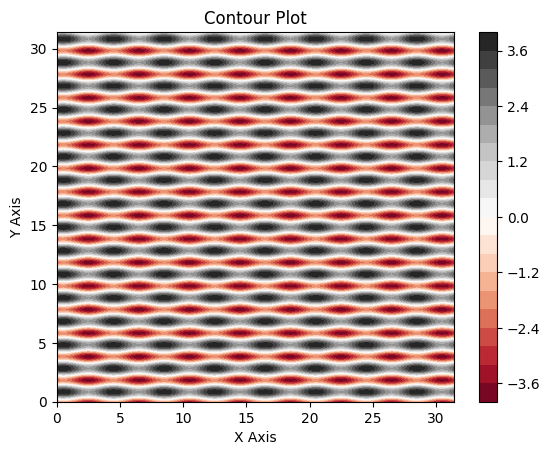

Saved as Horizontal.svg in C:\Users\jthej\Desktop\Computing


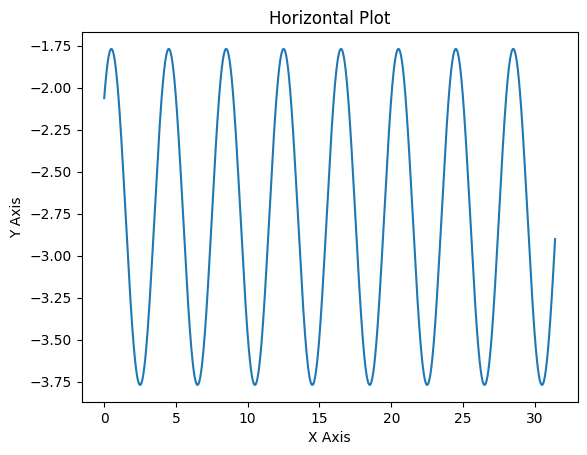

Saved as Vertical.svg in C:\Users\jthej\Desktop\Computing


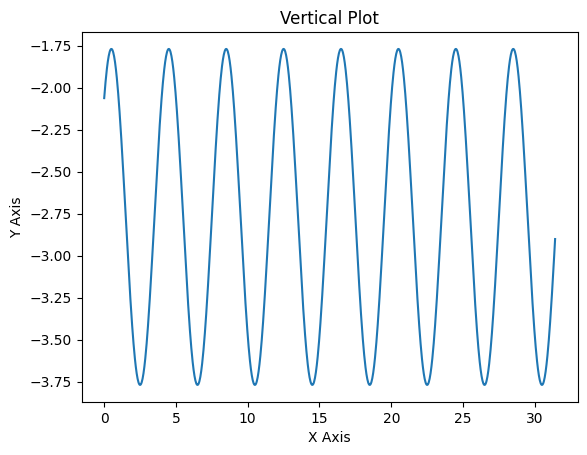

In [3]:
# importing matplotlib for plotting functions
import matplotlib.pyplot as plt
# importing numpy for arrays used in graphing
import numpy as np
# importing to print the file path image is saved in
from pathlib import Path

# array of inputs for values function
tags = np.array(['A', 'B', 'm', 'n', 'Φ', 'Ψ'])
# creating slots for the inputs
inputs = np.zeros(tags.size)
# these values were used to test code faster
# test_inputs = np.array([1, 3, 1, 0.5, np.pi / 4, np.pi / 3])
# used to test code faster
# inputs = test_inputs
# resolution of graphs that are made (lower = less smooth)
resolution = 1000


# values function for inputting data
def values():
    # recognizing variables as global so they dont only remain in function
    global tags, inputs
    # start loop for different inputs
    for r in range(tags.size):
        # references current array indicie to take value
        inputs[r] = float(input('Input ' + tags[r] + ' value: '))
        while True:
            # prints what user inputed
            print(tags[r] + ' entered as ' + str(inputs[r]))
            # gets user input to confirm inputted value
            ans = str(input('Is this correct? (Y/N): ')).lower()
            if ans == 'y':
                # leaves loop if positive response
                break
            elif ans == 'n':
                # replaces value with new value
                inputs[r] = float(input('Input new ' + tags[r] + ' value: '))
            else:
                continue


# plotting function
def plotting():
    # global vars for previous inputs
    global resolution, inputs
    while True:
        # input for graph type
        ans = str(input('Contour (C), Linear (L), or End (E): ')).lower()
        if ans == 'c':
            # required inputs for plotting
            x_min = float(input('X Minimum: '))
            x_max = float(input('X Maximum: '))
            y_min = float(input('Y Minimum: '))
            y_max = float(input('Y Maximum: '))
            # array for x values to calculate
            x = np.empty([resolution, resolution])
            # array for y values to calculate
            y = np.empty([resolution, resolution])
            # array for magnitude of function
            z = np.empty([resolution, resolution])
            # for loop to create linspace values for x and y ranges
            for r in range(resolution):
                x[r] = np.linspace(x_min, x_max, num=resolution)
                y[r] = np.linspace(y_min, y_max, num=resolution)
            # creates a column based instead of row based vector
            y = np.rot90(y, 3)
            # for loop to get magnitude of equation for the contour graph
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    z[i, j] = (inputs[0] * np.sin((inputs[3] * np.pi * x[i, j]) + inputs[4])) \
                              + (inputs[1] * np.sin((inputs[2] * np.pi * y[i, j]) + inputs[5]))
            plt.contourf(x, y, z, 20, cmap='RdGy')  # contour plotting
            plt.colorbar()
            plt.title('Contour Plot')
            plt.xlabel('X Axis')
            plt.ylabel('Y Axis')
            # creates naming convention
            name = 'Contour.svg'
            # saves files
            plt.savefig(name)
            # prints save name and location
            print('Saved as {} in {}'.format(name, Path.cwd()))
            plt.show()
        elif ans == 'l':
            while True:
                # input for shape of graph
                ans0 = str(input('Horizontal (H) or Vertical (V) Plot: ')).lower()
                # horizontal case
                if ans0 == 'h':
                    # obtaining inputs for nessecary values
                    y_con = float(input('Constant Y Value: '))
                    x_min = float(input('X Minimum Value: '))
                    x_max = float(input('X Maximum Value: '))
                    # x array
                    x = np.linspace(x_min, x_max, num=resolution)
                    # y array allocation
                    y = np.empty(resolution)
                    # loop to return values on given x and y references
                    for r in range(y.size):
                        y[r] = (inputs[0] * np.sin((inputs[3] * np.pi * x[r]) + inputs[4])) \
                               + (inputs[1] * np.sin((inputs[2] * np.pi * y_con) + inputs[5]))
                    plt.plot(x, y)
                    # plotted and created figure name
                    name = 'Horizontal.svg'
                    # labels and titles
                    plt.title('Horizontal Plot')
                    plt.xlabel('X Axis')
                    plt.ylabel('Y Axis')
                    plt.savefig(name)
                    # print save name and location for user
                    print('Saved as {} in {}'.format(name, Path.cwd()))
                    # show plot
                    plt.show()
                # repeats last section but for vertical plot
                elif ans0 == 'v':
                    x_con = float(input('Constant X Value: '))
                    y_min = float(input('Y Minimum Value: '))
                    y_max = float(input('Y Maximum Value: '))
                    y = np.linspace(y_min, y_max, num=resolution)
                    x = np.empty(resolution)
                    for r in range(y.size):
                        x[r] = (inputs[0] * np.sin((inputs[3] * np.pi * y[r]) + inputs[4])) \
                               + (inputs[1] * np.sin((inputs[2] * np.pi * x_con) + inputs[5]))
                    plt.plot(y, x)
                    plt.title('Vertical Plot')
                    plt.xlabel('X Axis')
                    plt.ylabel('Y Axis')
                    name = 'Vertical.svg'
                    plt.savefig(name)
                    print('Saved as {} in {}'.format(name, Path.cwd()))
                    plt.show()
                # continues loop until proper input
                else:
                    continue
                break
        # end condition for input loop
        elif ans == 'e':
            return
        # reloops if not valid input
        else:
            continue


# running functions
values()
plotting()
